# ข้อ 6: ตรวจหาเส้นตรงด้วย Hough Lines

Notebook นี้ใช้สำหรับตรวจหาเส้นตรงจากภาพขอบ (Edge Image) และวาดเส้นสีแดง พร้อมนับจำนวนเส้นตรงที่พบ

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
# -------------------------------
# Load & Convert to Grayscale
# -------------------------------
def load_and_convert_to_grayscale(image_path):
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Could not load image from {image_path}")
        return None, None
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return image, gray

def canny_edge_detection(gray_image):
    edges = cv2.Canny(gray_image, threshold1=100, threshold2=200)
    kernel = np.ones((3,3), np.uint8)
    edges = cv2.dilate(edges, kernel, iterations=1)
    #edges = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel, iterations=2)
    return edges


def hough_line_detection(edge_image, original_image):
    lines = cv2.HoughLinesP(
        edge_image,
        rho=1,
        theta=np.pi / 180,
        threshold=100,
        minLineLength=50,
        maxLineGap=10
    )

    result = original_image.copy()

    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(result, (x1, y1), (x2, y2),
                     (0, 0, 255), 2)

    return result



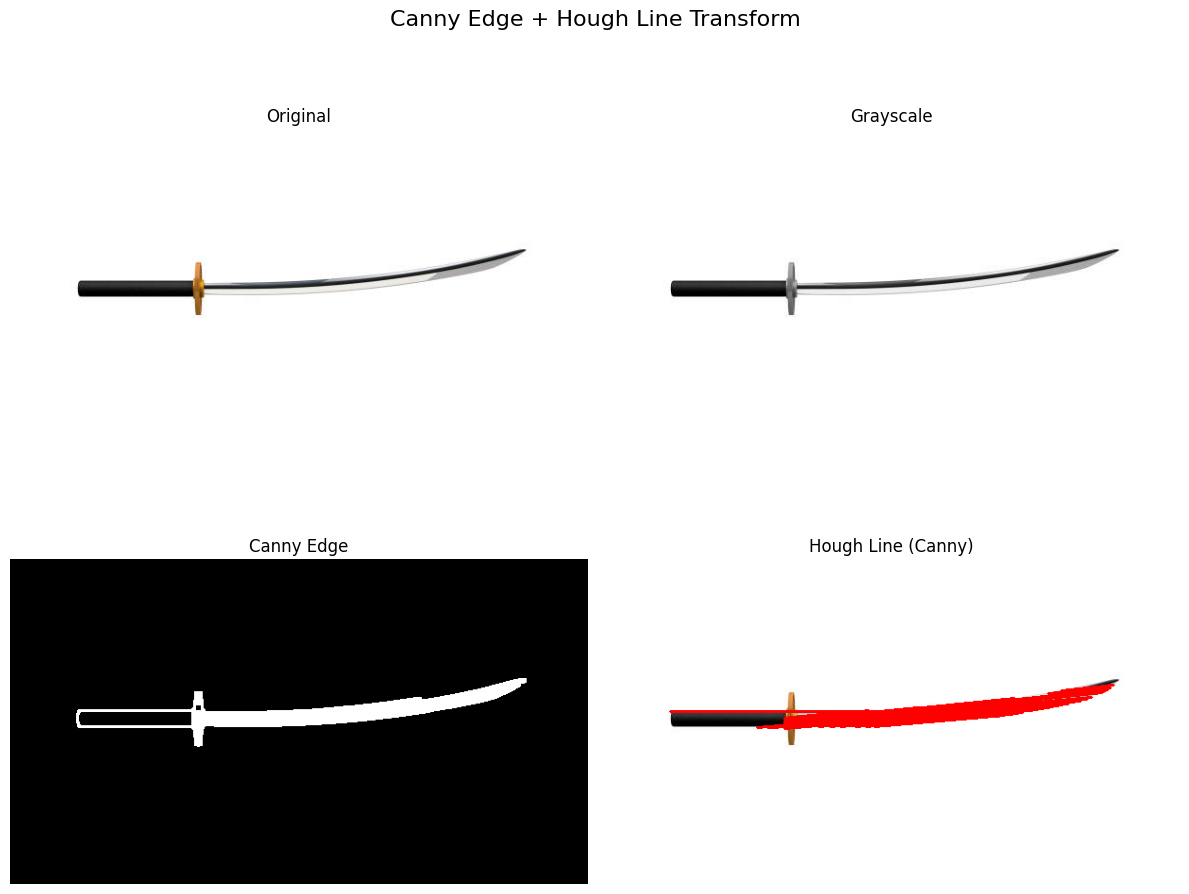

In [29]:
# -------------------------------
# Main Process
# -------------------------------
def process_image(image_path, output_dir="output"):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    original, gray = load_and_convert_to_grayscale(image_path)
    if gray is None:
        return

    edges = canny_edge_detection(gray)
    hough_img = hough_line_detection(edges, original)

    results = {
        "Original": cv2.cvtColor(original, cv2.COLOR_BGR2RGB),
        "Grayscale": gray,
        "Canny Edge": edges,
        "Hough Line (Canny)": cv2.cvtColor(hough_img, cv2.COLOR_BGR2RGB)
    }

    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    fig.suptitle("Canny Edge + Hough Line Transform", fontsize=16)

    for ax, (title, img) in zip(axes.ravel(), results.items()):
        cmap = 'gray' if len(img.shape) == 2 else None
        ax.imshow(img, cmap=cmap)
        ax.set_title(title)
        ax.axis('off')

    plt.tight_layout()
    save_path = os.path.join(output_dir, f"hough_{os.path.basename(image_path)}")
    plt.savefig(save_path)
    plt.show()


# -------------------------------
# Run
# -------------------------------
if __name__ == "__main__":
    image_path = "C:\\Users\\enjoykubphom\\Documents\\GitHub\\Mini_Visionv1\\img\\line6.jpg"   # เปลี่ยนเป็นรูปของคุณ
    process_image(image_path)